In [55]:
import numpy as np
import matplotlib.pyplot as plt
import math
import sympy
from sympy import *

In [56]:
data = np.loadtxt('M1.0_history_simple.out')
surface_temperature = data[:,4]
luminosity = data[:,5]
central_temperature = data[:,3]
central_density = data[:,2]
mass_fraction = data[:,6]
time = data[:,0]

data2 = np.loadtxt('M8.0_history_simple.out')
surface_temperature_8 = data2[:,4]
luminosity_8 = data2[:,5]
central_temperature_8 = data2[:,3]
central_density_8 = data2[:,2]
mass_fraction_8 = data2[:,6]
time_8 = data2[:,0]

data3 = np.loadtxt('M15.0_history_simple.out')
surface_temperature_15 = data3[:,4]
luminosity_15 = data3[:,5]
central_temperature_15 = data3[:,3]
central_density_15 = data3[:,2]
mass_fraction_15 = data3[:,6]
time_15 = data3[:,0]

Text(0, 0.5, 'Luminosity')

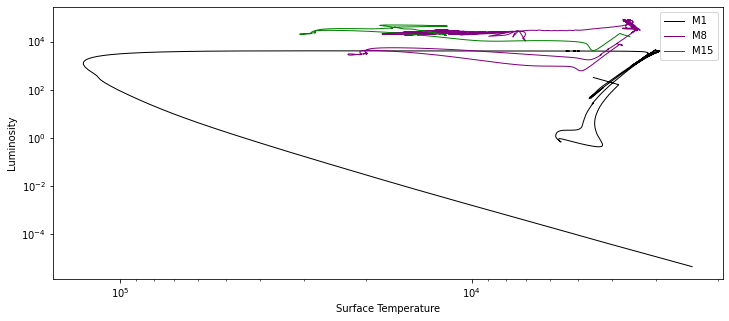

In [57]:
fig = plt.figure(figsize=(12,5))

plt.plot(surface_temperature, luminosity, lw=1, c='black', label = 'M1')
plt.plot(surface_temperature_8, luminosity_8, lw=1, c='purple', label='M8' )
plt.plot(surface_temperature_15, luminosity_15, lw=1, c='green', label= 'M15')

plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.gca().invert_xaxis()
plt.xlabel('Surface Temperature')
plt.ylabel('Luminosity')

In [66]:
N_a = 6.022*10**23
kB = 1.38*10**(-16)
mu = 0.6135
m_e = 9.109*10**(-28)
h = 6.626 * 10**(-27)
m_h = 1.674*10**(-24)
mu_e = 1.17
simplify((20*m_e/h**2) * (math.pi/3)**(2/3) * m_h**(5/3) * mu_e**(5/3))

1.31195550334884e-13

Text(0, 0.5, 'Central Density')

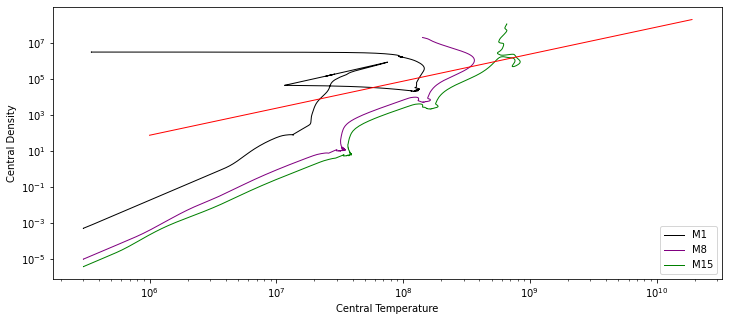

In [68]:
fig = plt.figure(figsize=(12,5))

plt.plot(central_temperature, central_density, lw=1, c='black', label = 'M1')
plt.plot(central_temperature_8, central_density_8, lw=1, c='purple', label='M8' )
plt.plot(central_temperature_15, central_density_15, lw=1, c='green', label= 'M15')

def rho(T):
    return ((N_a*kB*T/mu) * 1.31195550334885*10**(-13))**(3/2)
T = np.linspace(10**6, 19*10**9, 1000)
plt.plot(T, rho(T), lw=1.0, c="red")

plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Central Temperature')
plt.ylabel('Central Density')

Text(0, 0.5, 'time')

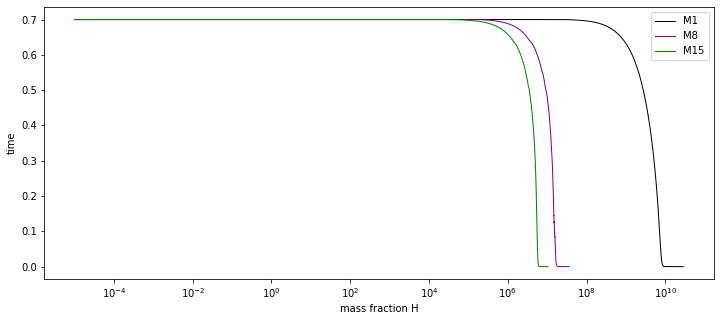

In [75]:
fig = plt.figure(figsize=(12,5))

plt.plot(time, mass_fraction, lw=1, c='black', label = 'M1')
plt.plot(time_8, mass_fraction_8, lw=1, c='purple', label='M8' )
plt.plot(time_15, mass_fraction_15, lw=1, c='green', label= 'M15')
plt.legend()
plt.xscale('log')
plt.xlabel('mass fraction H')
plt.ylabel('time')


In [77]:
data4 = np.loadtxt('M1.0_profile_H_simple.out')
rho = data4[:,2]
temp = data4[:,3]

data5 = np.loadtxt('M8.0_profile_H_simple.out')
rho_8 = data5[:,2]
temp_8 = data5[:,3]

data6 = np.loadtxt('M15.0_profile_H_simple.out')
rho_15 = data6[:,2]
temp_15 = data6[:,3]

Text(0, 0.5, 'Temperature')

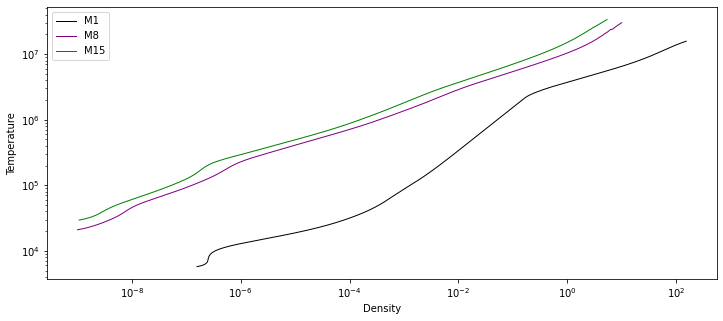

In [79]:
fig = plt.figure(figsize=(12,5))

plt.plot(rho, temp, lw=1, c='black', label = 'M1')
plt.plot(rho_8, temp_8, lw=1, c='purple', label='M8' )
plt.plot(rho_15, temp_15, lw=1, c='green', label= 'M15')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Density')
plt.ylabel('Temperature')